Importing the required Library for the Linear regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Reading the file

In [2]:
df= pd.read_csv("/content/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Perfroming the basic EDA

In [3]:
df.duplicated().sum()

1

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


Using the LabelEncoder to convert the object datatype to the Integer datatype

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for col in df.columns:
  if df[col].dtype == object:
    df[col] = encoder.fit_transform(df[col])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   int64  
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 83.6 KB


Removing the Target Variable and Independent Variables

In [8]:
x=df.drop(columns=["charges"])
y=df["charges"]

Model build for the Linear Regression Model

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.1,random_state=42)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


0.7853814689062368

In [10]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.001626,0.298308
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.004936,0.058044
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.157574,0.198401
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,-0.002358,0.787234
region,0.001626,0.004936,0.157574,0.016258,-0.002358,1.000000,-0.006547
charges,0.298308,0.058044,0.198401,0.067389,0.787234,-0.006547,1.000000


Building New Model after treeting the outliers


In [11]:
 df1= pd.read_csv("/content/insurance.csv")
 df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Removing the duplicates and null values:


In [12]:
print(f"null data {df1.isna().sum()}")
print(f"duplicated data {df1.duplicated().sum()}")
df1.drop_duplicates(inplace=True)
df1.info()

df1

null data age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
duplicated data 1
<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Outliers Treating

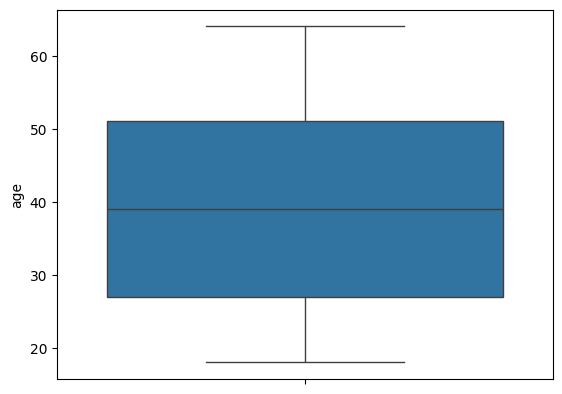

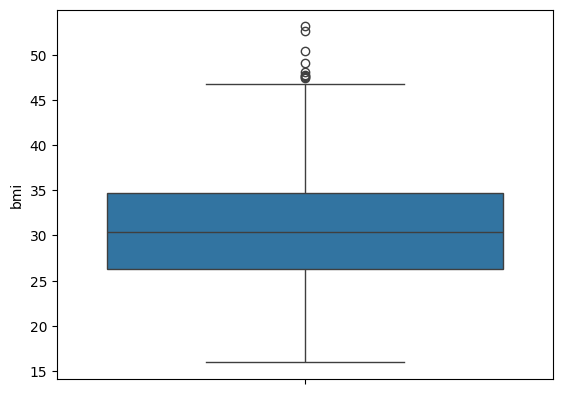

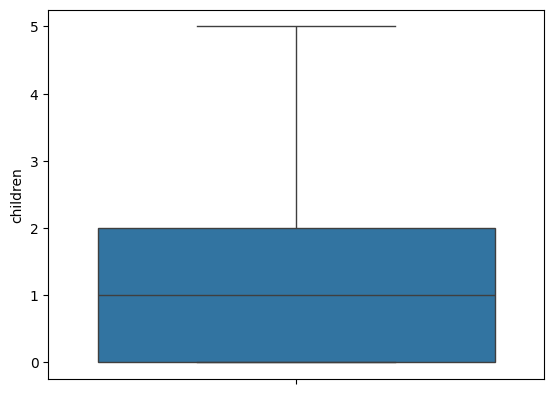

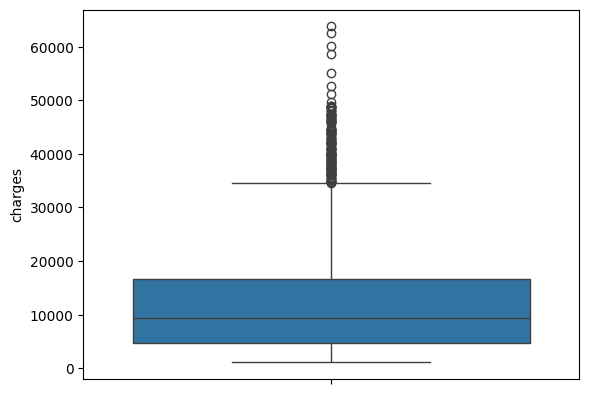

In [13]:
for col in df1.columns:
  if df1[col].dtype in [np.int64,np.float64]:
    q1= df1[col].quantile(0.25)
    q3= df1[col].quantile(0.75)
    iqr= q3-q1
    lower_bound= q1-1.5*iqr
    upper_bound= q3+1.5*iqr
    sns.boxplot(df1[col])
    plt.show()



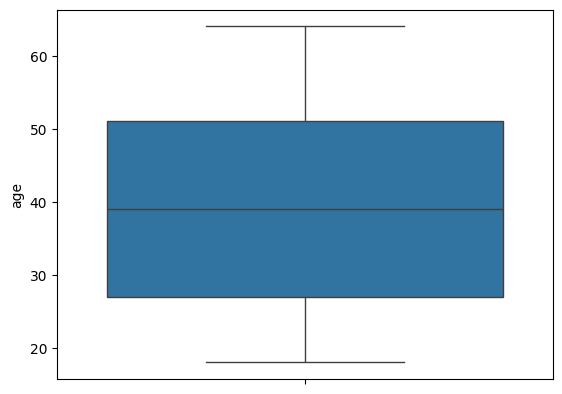

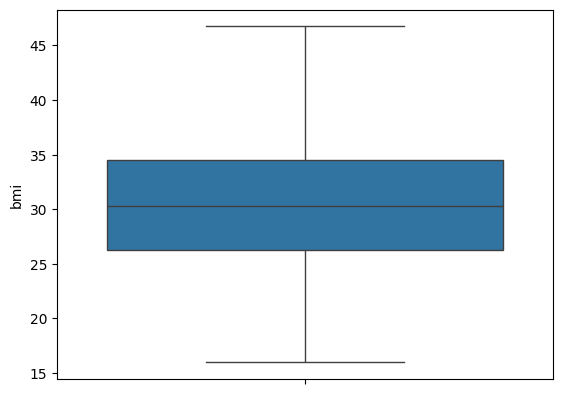

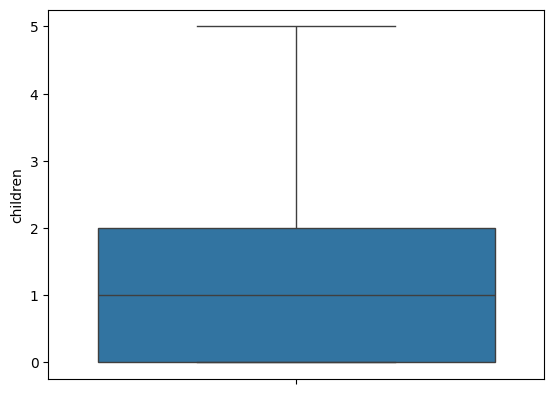

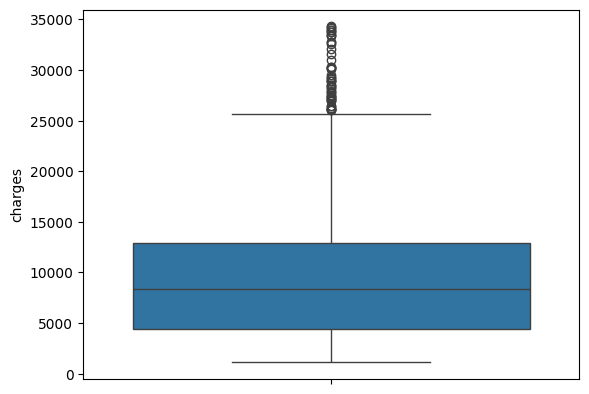

In [14]:
for col in df1.columns:
  if df1[col].dtype in [np.int64,np.float64]:
    q1= df1[col].quantile(0.25)
    q3= df1[col].quantile(0.75)
    iqr= q3-q1
    lower_bound= q1-1.5*iqr
    upper_bound= q3+1.5*iqr
    df1= df1[(df1[col]>=lower_bound) & (df1[col]<=upper_bound)]
    sns.boxplot(df1[col])
    plt.show()

Df1 details

In [15]:
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1190 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1190 non-null   int64  
 1   sex       1190 non-null   object 
 2   bmi       1190 non-null   float64
 3   children  1190 non-null   int64  
 4   smoker    1190 non-null   object 
 5   region    1190 non-null   object 
 6   charges   1190 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 74.4+ KB


,age,bmi,children,charges
count,1190.000000,1190.000000,1190.000000,1190.000000
mean,39.027731,29.993147,1.088235,9908.046614
std,14.050554,5.873027,1.216558,7186.405555
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,25.800000,0.000000,4418.591062
50%,39.000000,29.700000,1.000000,8378.605575
75%,51.000000,33.770000,2.000000,12955.356300
max,64.000000,46.750000,5.000000,34303.167200


In [16]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for col in df1.columns:
  if df1[col].dtype == object:
    if col == "sex":
      df1['sex'] = df1['sex'].replace({'male': 0, 'female': 1})
    else:
      df1[col] = encoder.fit_transform(df1[col])

<ipython-input-16-1dac62ae600c>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['sex'] = df1['sex'].replace({'male': 0, 'female': 1})


In [17]:
x_Eda = df1.drop(columns=["charges"])
y_Eda = df1["charges"]
x_train,x_test,y_train,y_test= train_test_split(x_Eda,y_Eda,test_size=0.2,random_state=60)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6545504457164266

Doing Feature Engineering

<Axes: >

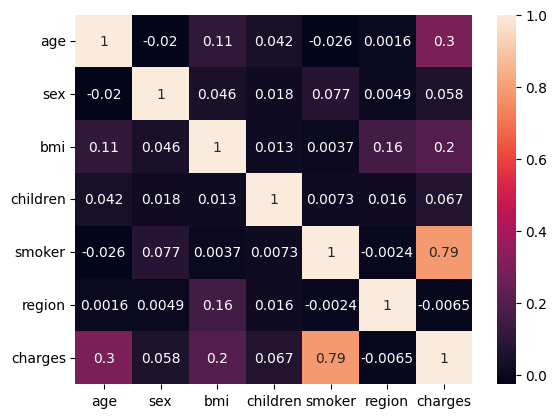

In [18]:
sns.heatmap(df.corr(),annot=True)

In [19]:
df1.drop(columns=["region","children","sex"],inplace=True)
df1

,age,bmi,smoker,charges
0,19,27.900,1,16884.92400
1,18,33.770,0,1725.55230
2,28,33.000,0,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,0,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [20]:
x_reduced=df1.drop(columns=["charges"])
y_reduced=df1["charges"]

In [21]:
x_train,x_test,y_train,y_test= train_test_split(x_reduced,y_reduced,test_size=0.2,random_state=60)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6433087807054343

In [22]:
df2=pd.read_csv("/content/insurance.csv")
df2

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [23]:
df2.drop_duplicates(inplace=True)

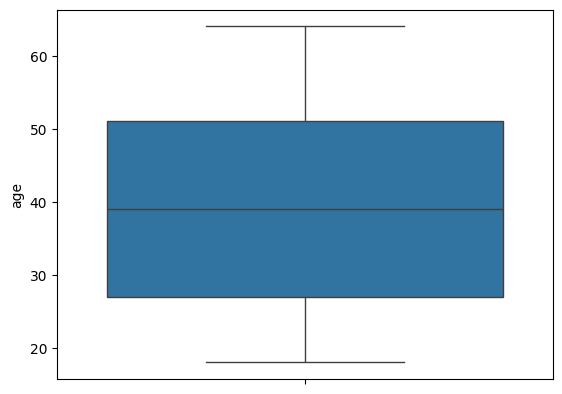

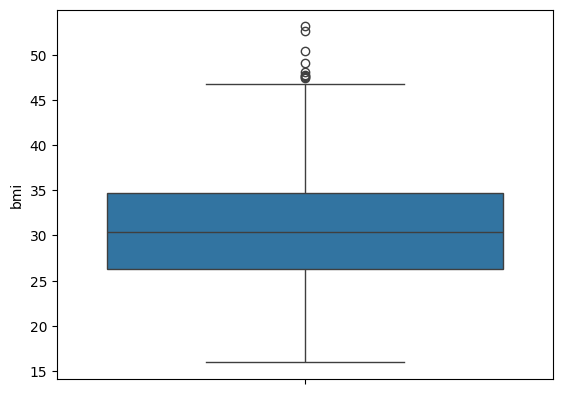

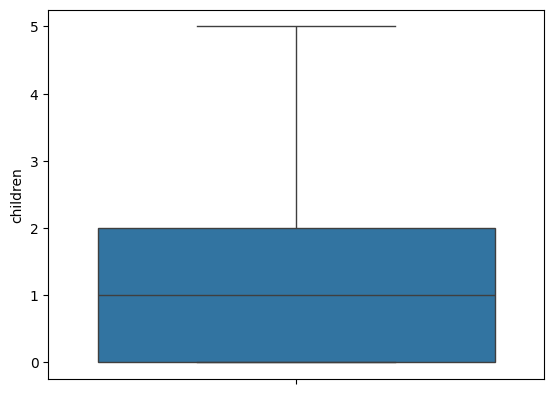

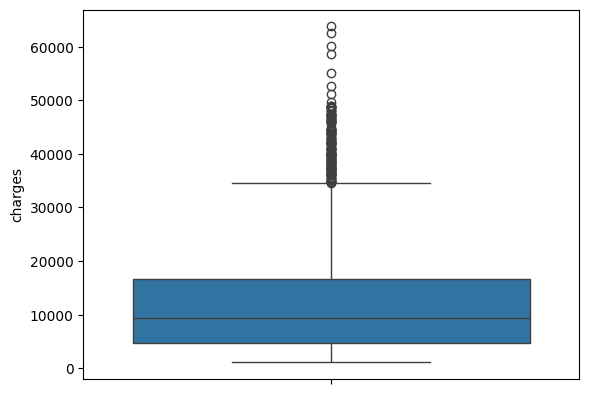

In [24]:
for col in df2.columns:
  if df2[col].dtype in [np.int64,np.float64]:
    q1= df2[col].quantile(0.25)
    q3= df2[col].quantile(0.75)
    iqr= q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    sns.boxplot(df2[col])
    plt.show()

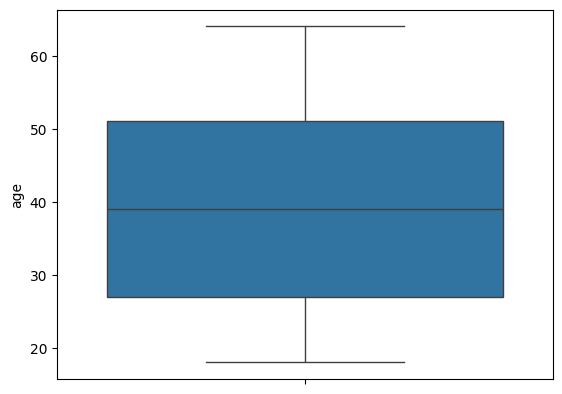

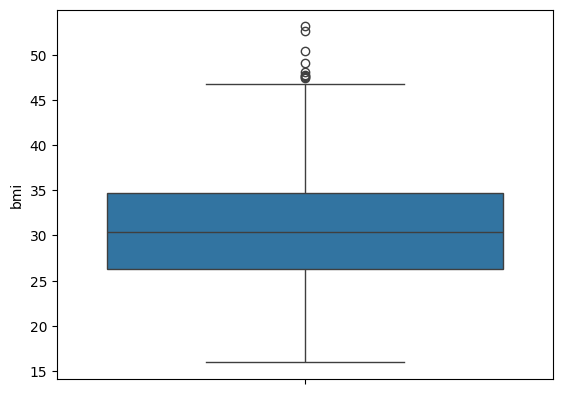

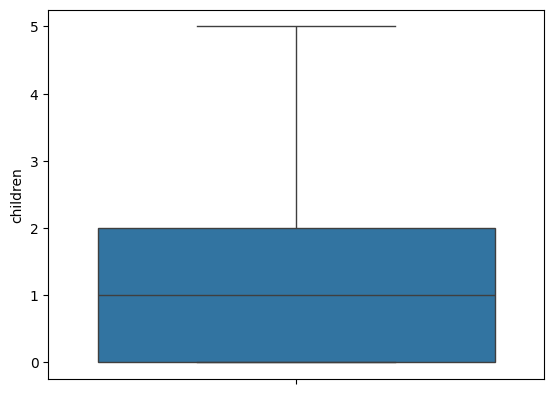

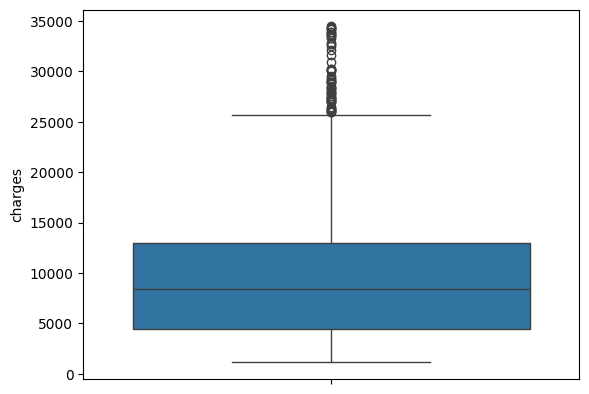

In [25]:
for col in df2.columns:
  if df2[col].dtype in [np.int64,np.float64]:
    df2=df2[(df2[col]>=lower_bound) & (df2[col]<=upper_bound)]
    sns.boxplot(df2[col])
    plt.show()

In [26]:
df2

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [27]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for col in df2.columns:
  if df2[col].dtype == object:
    if col == "sex":
      df2['sex'] = df2['sex'].replace({'male': 0, 'female': 1})
    else:
      df2[col] = encoder.fit_transform(df2[col])

<ipython-input-27-05e9862ebc78>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['sex'] = df2['sex'].replace({'male': 0, 'female': 1})


In [28]:
df2

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,1,10600.54830
1334,18,1,31.920,0,0,0,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


In [59]:
x=df2.drop(columns=["charges"])
y=df2["charges"]

In [60]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
pca=PCA(n_components=5)
x=pca.fit_transform(x)
print(f"Selected Number of Components: {pca.n_components_}")

Selected Number of Components: 5


In [61]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.1,random_state=30)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6148372201958665

In [34]:
from sklearn.feature_selection import RFE

In [42]:
x=df2.drop(columns=["charges"])
y=df2["charges"]

In [43]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,3
1,18,0,33.770,1,0,2
2,28,0,33.000,3,0,2
3,33,0,22.705,0,0,1
4,32,0,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,1
1334,18,1,31.920,0,0,0
1335,18,1,36.850,0,0,2
1336,21,1,25.800,0,0,3


In [48]:
rfe = RFE(estimator=LinearRegression(), n_features_to_select=3)
x_rfe = rfe.fit_transform(x,y)

In [49]:
selected_features = x.columns[rfe.support_]
print(selected_features)

Index(['sex', 'children', 'smoker'], dtype='object')


In [55]:
X_train_rfe, X_test_rfe, y_train, y_test = train_test_split(x_rfe, y, test_size=0.1, random_state=30)
model_rfe = LinearRegression()
model_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = model_rfe.predict(X_test_rfe)

r2_rfe = r2_score(y_test, y_pred_rfe)
r2_rfe


0.45279127752328885